<a href="https://colab.research.google.com/github/AndresfCrialesc/seminario_bigData/blob/main/Entrega_Laboratorio_No_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

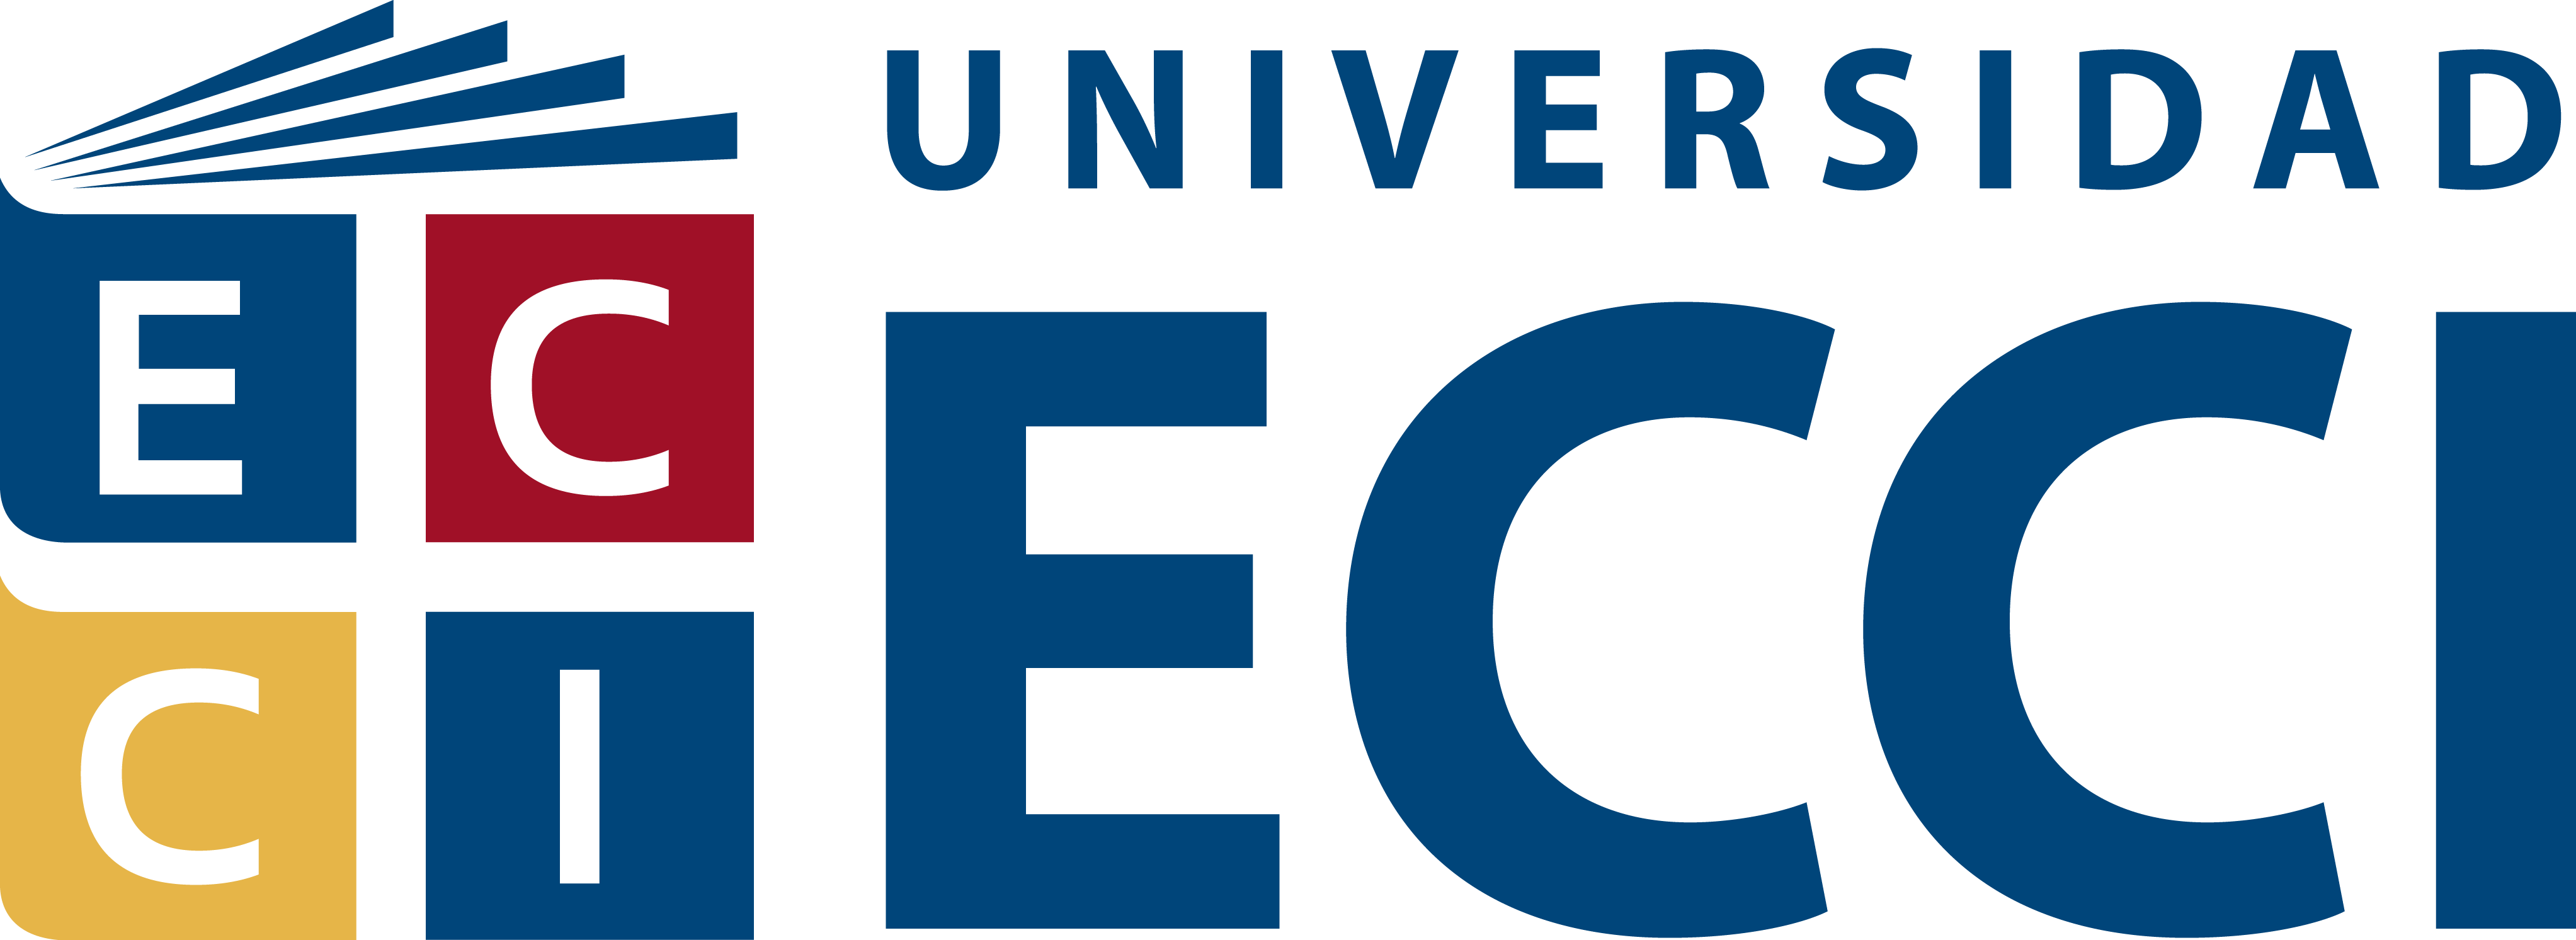

# **ANALISIS DE NOTICIAS PYSENTIMIENTO - LABORATORIO NO. 5**
## **Autor**: Kevin Steven Olivera Caicedo [GitHub](https://github.com/KevinO26)
## **Cod**. 64178

In [ ]:
# Importamos la libreria para tomar datos de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# hacemos la instalasion temporal para pysentimiento
!pip install pysentimiento

In [ ]:
# hacemos la instalacion temporal de la libreria nltk
!pip install nltk

In [ ]:
# Importamos la librerias correspondientes en este caso nltk, pandas, pysentimiento, transformers
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from pysentimiento import create_analyzer
import transformers

# descargamos el package de stopwords
nltk.download('stopwords')

# como es texto ya armado entonces utilizamos los transformes
transformers.logging.set_verbosity(transformers.logging.ERROR)

# Declaraos nuetra varable analyzer la cual va contener la tarea de analizar sentimientos
analyzer = create_analyzer(task="sentiment", lang="es")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# cargamos nuestro archivo de noticias y procedo a imprimir 2 columnas para ver su orden
cargaNoticias = pd.read_excel("/content/drive/MyDrive/bigData/Noticias2ver.xlsx")
cargaNoticias.head(2)

,Columna1,Título,info,contenido,Tipo
0,0,¿Cómo potencializar las ventas de un emprendim...,La época de crisis de salud por coronavirus es...,En medio de la coyuntura ocasionada por la pro...,economia
1,1,Así apoyará Corea del Sur al país para enfrent...,El Presidente aseguró que ya le han devuelto e...,"Este jueves, en el noveno día de cuarentena na...",Politica y Opinion


In [ ]:
# quitamos la columna contenido ya que la vamos a remplesar por un contenido limpio
contenido = cargaNoticias['contenido'].dropna()

# creamos una funcion para limpiar todas la palabras de esa columna contenido
def limpiarPalabras(texto):
  texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE) # Quitamos contenido que no necesitomos y espacios en blanco
  texto = re.sub(r'\@w+|\#','', texto)
  texto = re.sub(r'[^\w\s]', '', texto)
  texto = " ".join(word for word in texto.split() if word not in stopwords.words('spanish'))# Quitamos las stopsWords
  return texto # Retonarmos el texto limpio

cargaNoticias['contenido_limpiado'] = contenido.apply(limpiarPalabras) # creamos una nueva columna llamada contendio_limpiado
contenido_limpiado = cargaNoticias['contenido_limpiado'] # guardamos todo en una varaible llamada contenido_limpiado

In [ ]:
# creamos una nueva columna donde declaramos una funcion lamba y tomo cada texto en mi variable x de contenido limpio y le aplico el predict y devolvemos el atributo output para devolver
# estas tres varables NEG, NEU, POS de todo lo analizado y poder graficar
sentimientos = contenido_limpiado.apply(lambda x: analyzer.predict(x).output)
contenido_sentimiento = sentimientos.value_counts() # tomamos el valor contado

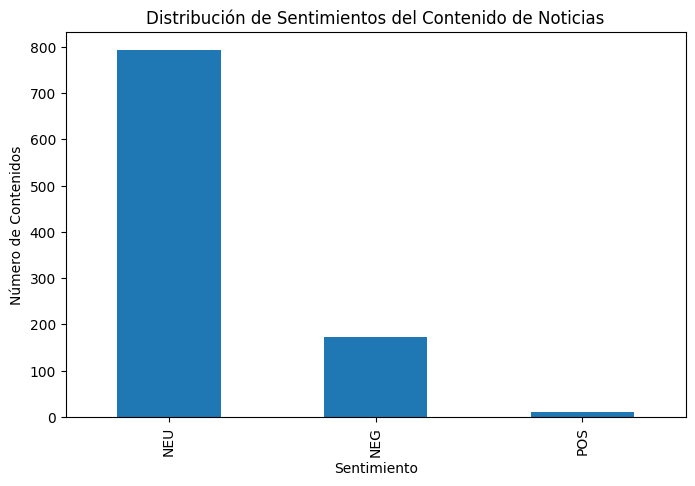

In [ ]:
# Importamos la librarias de grafica
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5)) # declaramos la figura en pulgadas
contenido_sentimiento.plot(kind='bar')# declaramos es que de tipo barras
plt.title('Distribución de Sentimientos del Contenido de Noticias') # Agregamos un titulo
plt.xlabel('Sentimiento') # luego el titulo de nuestra varariables
plt.ylabel('Número de Contenidos') # el titulo de la cantidad de comentarios
plt.show() # mostramos la grafica


config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

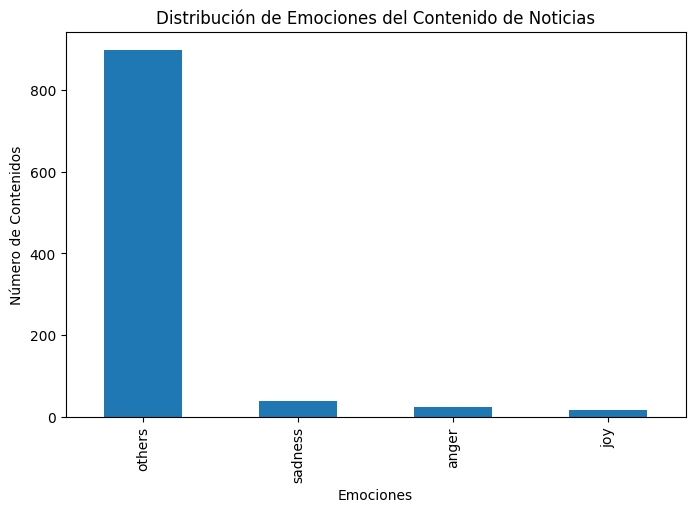

In [ ]:
emociones_noticias = create_analyzer(task="emotion", lang="es") # cremoas una varaible donde creamos el analizer pero esta vez con la tarea de declarar emociones
# repetimos el mismo proceso de arriba para hacer la respectiba graficacion
emociones = contenido_limpiado.apply(lambda x: emociones_noticias.predict(x).output)
contenido_emocion = emociones.value_counts()

plt.figure(figsize=(8,5))
contenido_emocion.plot(kind='bar')
plt.title('Distribución de Emociones del Contenido de Noticias')
plt.xlabel('Emociones')
plt.ylabel('Número de Contenidos')
plt.show()

config.json:   0%|          | 0.00/956 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

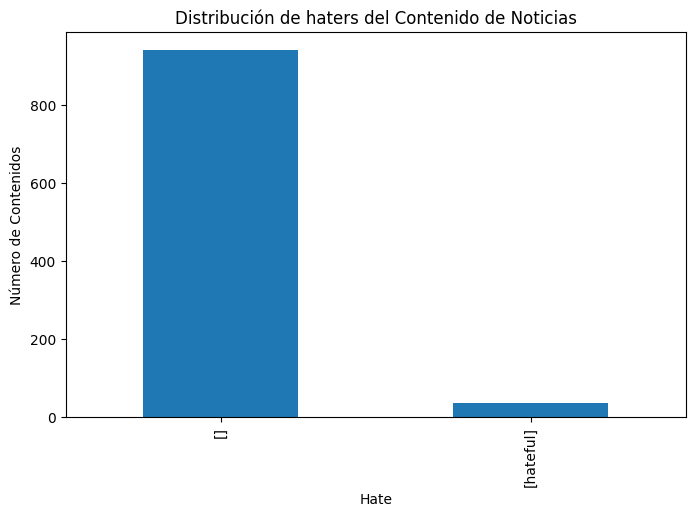

In [ ]:
hate_analyzer_Noticia = create_analyzer(task="hate_speech", lang="es") # declaramos una varaible para medir los hat con la tarea hate_speech
# seguimos el mismo camino de la primera grafica para poder graficar los hate
hate_analyzer = contenido_limpiado.apply(lambda x: hate_analyzer_Noticia.predict(x).output)
contenido_hate = hate_analyzer.value_counts()

plt.figure(figsize=(8,5))
contenido_hate.plot(kind='bar')
plt.title('Distribución de haters del Contenido de Noticias')
plt.xlabel('Hate')
plt.ylabel('Número de Contenidos')
plt.show()

#para este caso pense que habia graficado mal pero por su parte el analizis indico que de contenido de las noticias solo encontro enos de 200 comentarios haciendo hate.